**Objective:** Build a classification model that is trained on the human DNA sequence and can predict a gene family based on the DNA sequence of the coding sequence. To test the model, we will use the DNA sequence of humans, dogs, and chimpanzees and compare the accuracies.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import time

In [3]:
# size of our kmer words
k_mer = 7

#### reading and exploring the data

In [4]:
human_dna = pd.read_table('HCD_data/human.txt')
chimp_dna = pd.read_table('HCD_data/chimpanzee.txt')
dog_dna = pd.read_table('HCD_data/dog.txt')
human_dna.head(3)

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3


In [5]:
len(human_dna), len(chimp_dna), len(dog_dna)

(4380, 1682, 820)

In [6]:
def kmer_fun(seq, win_size):
    return [seq[x:x+win_size].lower() for x in range(len(seq) - win_size + 1)]


#So let’s try it out with a simple sequence:
mySeq = 'GTGCCA'
kmer_fun(mySeq, win_size=k_mer)

[]

In [7]:
# merging the three dataframes 
all_dna_data = pd.concat([human_dna, dog_dna, chimp_dna])
all_dna_data.sample(frac=1).reset_index(inplace=True, drop = True)
all_dna_data.tail()

,sequence,class
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3
1681,ATGTTGCCCAGCTGTGGCAAGATCTTGACTGGGTGTAAGAATATGC...,3


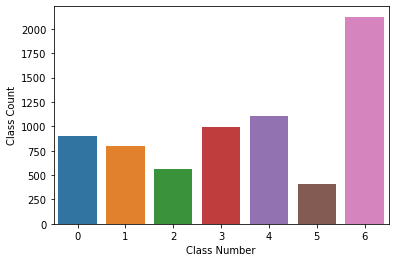

In [8]:
sns.countplot(x =all_dna_data['class'].to_numpy())
# plt.title("Class Distribution in data")
plt.xlabel('Class Number')
plt.ylabel('Class Count')
plt.savefig('class_dist.png')
plt.show()

In [9]:
all_dna_data[str(k_mer)+'-mer'] = all_dna_data.apply(
                    lambda x: kmer_fun(x['sequence'], win_size= k_mer), axis=1)
all_dna_data.head()

,sequence,class,7-mer
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgcccc, tgcccca, gccccaa, ccccaac, cccaact, ..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaacg, tgaacga, gaacgaa, aacgaaa, acgaaaa, ..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaac, tgcaaca, gcaacag, caacagc, aacagca, ..."


In [10]:
# making sentences based on the k-mers
dna_texts = list(all_dna_data[str(k_mer)+'-mer'])
for item in range(len(dna_texts)):
    dna_texts[item] = ' '.join(dna_texts[item])

print('Sample 1: ', dna_texts[0])

Sample 1:  atgcccc tgcccca gccccaa ccccaac cccaact ccaacta caactaa aactaaa actaaat ctaaata taaatac aaatact aatacta atactac tactacc actaccg ctaccgt taccgta accgtat ccgtatg cgtatgg gtatggc tatggcc atggccc tggccca ggcccac gcccacc cccacca ccaccat caccata accataa ccataat cataatt ataatta taattac aattacc attaccc ttacccc taccccc accccca cccccat ccccata cccatac ccatact catactc atactcc tactcct actcctt ctcctta tccttac ccttaca cttacac ttacact tacacta acactat cactatt actattc ctattcc tattcct attcctc ttcctca tcctcat cctcatc ctcatca tcatcac catcacc atcaccc tcaccca cacccaa acccaac cccaact ccaacta caactaa aactaaa actaaaa ctaaaaa taaaaat aaaaata aaaatat aaatatt aatatta atattaa tattaaa attaaac ttaaaca taaacac aaacaca aacacaa acacaaa cacaaac acaaact caaacta aaactac aactacc actacca ctaccac taccacc accacct ccaccta cacctac acctacc cctacct ctacctc tacctcc acctccc cctccct ctccctc tccctca ccctcac cctcacc ctcacca tcaccaa caccaaa accaaag ccaaagc caaagcc aaagccc aagccca agcccat gcccata cccataa ccataaa cataaaa ataaa

In [11]:
# We will be creating vectors that have a dimensionality equal to the size of our vocabulary,
# and if the text data features that vocab word, we will put a one in that dimension.
cv = CountVectorizer(ngram_range=(1, 1))
X = cv.fit_transform(dna_texts)

# get the labels
y = all_dna_data['class'].values 

In [12]:
X.shape

(6882, 16951)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   random_state=42,
                                                   test_size=0.3,
                                                   stratify=all_dna_data['class'])

In [14]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [15]:
cv.vocabulary_

{'atgcccc': 3680,
 'tgcccca': 15235,
 'gccccaa': 9595,
 'ccccaac': 5458,
 'cccaact': 5400,
 'ccaacta': 5165,
 'caactaa': 4222,
 'aactaaa': 449,
 'actaaat': 1801,
 'ctaaata': 7214,
 'taaatac': 12891,
 'aaatact': 200,
 'aatacta': 799,
 'atactac': 3196,
 'tactacc': 13295,
 'actaccg': 1820,
 'ctaccgt': 7293,
 'taccgta': 13206,
 'accgtat': 1463,
 'ccgtatg': 5859,
 'cgtatgg': 7000,
 'gtatggc': 11551,
 'tatggcc': 13776,
 'atggccc': 3744,
 'tggccca': 15492,
 'ggcccac': 10624,
 'gcccacc': 9584,
 'cccacca': 5413,
 'ccaccat': 5220,
 'caccata': 4443,
 'accataa': 1332,
 'ccataat': 5332,
 'cataatt': 4895,
 'ataatta': 3143,
 'taattac': 13083,
 'aattacc': 969,
 'attaccc': 3873,
 'ttacccc': 16009,
 'taccccc': 13183,
 'accccca': 1368,
 'cccccat': 5476,
 'ccccata': 5469,
 'cccatac': 5442,
 'ccatact': 5336,
 'catactc': 4909,
 'atactcc': 3200,
 'tactcct': 13313,
 'actcctt': 1893,
 'ctcctta': 7584,
 'tccttac': 14367,
 'ccttaca': 6108,
 'cttacac': 7991,
 'ttacact': 15995,
 'tacacta': 13126,
 'acactat': 1143,

### Helper funtions

In [16]:
# the funciton will draw a heat map
def make_heat_map(model, title= 'Heat map'):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, figsize=(4,4), hide_ticks=True,cmap=plt.cm.Blues)
    plt.title(title)
    plt.xticks(range(7), ['1','2','3','4','5','6','7'], fontsize=12)
    plt.yticks(range(7), ['1','2','3','4','5','6','7'], fontsize=12)
    plt.show()

In [17]:
def train_model(model, model_name = ''):
    s = time.time()
    model.fit(X_train, y_train)
    e = time.time()
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)
    f1_train = f1_score(y_train, preds_train, average = 'macro')
    f1_test = f1_score(y_test, preds_test, average = 'macro')
    print('{} produced train F1 score of {:.3f}'.format(model_name, f1_train))
    print('{} produced test F1 score of {:.3f}'.format(model_name, f1_test))
    print('Time took to train {:.3f} seconds'.format(e-s))
    make_heat_map(model, model_name)

### Models

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

##### Logistic regression

Logistic regression produced train F1 score of 0.999
Logistic regression produced test F1 score of 0.963
Time took to train 15.997 seconds


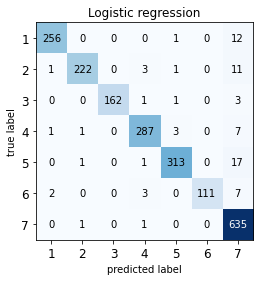

In [19]:
logReg = LogisticRegression(C = .1, random_state=0, max_iter = 500)
train_model(logReg, 'Logistic regression')

Logistic regression produced train F1 score of 1.000
Logistic regression produced test F1 score of 0.959
Time took to train 16.283 seconds


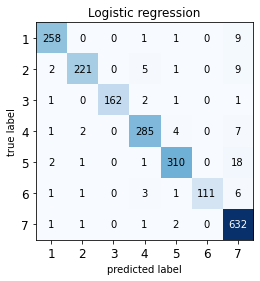

In [20]:
logReg = LogisticRegression(C = 1, random_state=0, max_iter = 500)
train_model(logReg, 'Logistic regression')

Logistic regression produced train F1 score of 1.000
Logistic regression produced test F1 score of 0.954
Time took to train 18.632 seconds


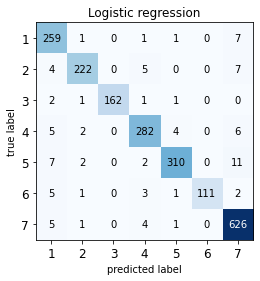

In [21]:
logReg = LogisticRegression(C = 10, random_state=0, max_iter = 500)
train_model(logReg, 'Logistic regression')

##### Random Forests

Random Forests 50 estimators produced train F1 score of 1.000
Random Forests 50 estimators produced test F1 score of 0.854
Time took to train 0.649 seconds


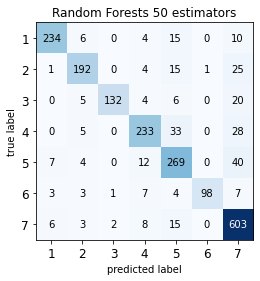

In [21]:
rf = RandomForestClassifier(n_estimators = 50)
train_model(rf, 'Random Forests 50 estimators')

Random Forests 100 estimators produced train F1 score of 1.000
Random Forests 100 estimators produced test F1 score of 0.856
Time took to train 1.318 seconds


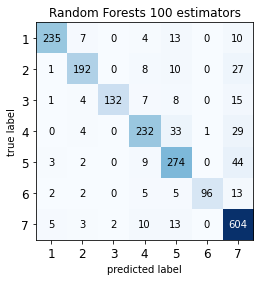

In [20]:
rf = RandomForestClassifier(n_estimators = 100)
train_model(rf, 'Random Forests 100 estimators')

Random Forests 200 estimators produced train F1 score of 1.000
Random Forests 200 estimators produced test F1 score of 0.859
Time took to train 2.673 seconds


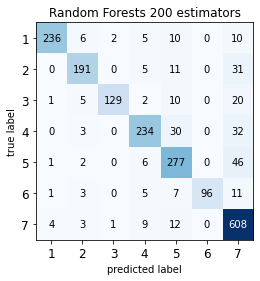

In [22]:
rf = RandomForestClassifier(n_estimators = 200)
train_model(rf, 'Random Forests 200 estimators')

##### SVM

SVM produced train F1 score of 0.575
SVM produced test F1 score of 0.600
Time took to train 1.693 seconds


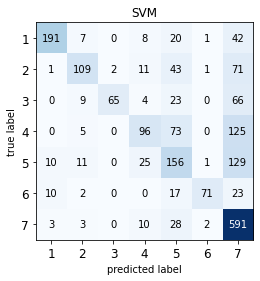

In [23]:
svm = SVC(kernel='rbf', gamma= 'scale', C = 1)
train_model(svm, 'SVM')

SVM produced train F1 score of 0.745
SVM produced test F1 score of 0.732
Time took to train 1.354 seconds


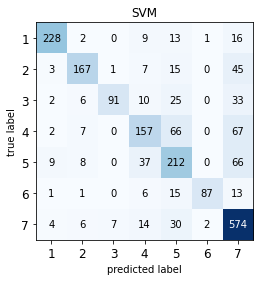

In [24]:
svm = SVC(kernel='rbf', gamma= 'scale', C = 10)
train_model(svm, 'SVM')

SVM produced train F1 score of 0.815
SVM produced test F1 score of 0.773
Time took to train 1.357 seconds


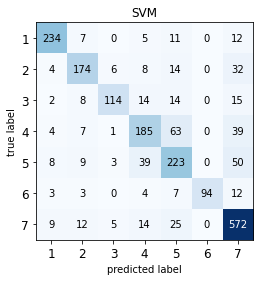

In [25]:
svm = SVC(kernel='rbf', gamma= 'scale', C = 50)
train_model(svm, 'SVM')

##### Naive Bayes

Gaussian Navie Bayes produced train F1 score of 0.134
Gaussian Navie Bayes produced test F1 score of 0.120
Time took to train 0.007 seconds


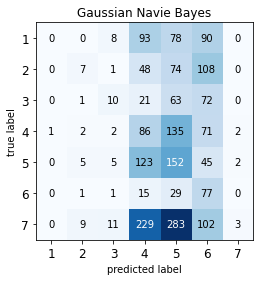

In [26]:
gnb = GaussianNB()
train_model(gnb, 'Gaussian Navie Bayes')